##### Importing the ncessary libraries

In [1]:
# pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import lightgbm

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [3]:
filename = r"C:\Users\Rise Networks\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filename)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### Information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

##### Data Cleaning

###### Checking for null values

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

###### Coverting TotalCharges datatype to float

In [9]:
import re
def clean_and_convert_to_float(x):
    cleaned_str = re.sub(r'[^\d.]+', '', str(x))
    try:
        return float(cleaned_str)
    except ValueError:
        return None

In [10]:
df["TotalCharges"] = df["TotalCharges"].map(clean_and_convert_to_float)

###### Statistical summary of the dataset

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### Preprocessing

###### Filling TotalCharges empty cells with 0

In [13]:
df["TotalCharges"].fillna(0, inplace=True)

###### Encoding the churn feature

In [14]:
df["Churn"] = df["Churn"].map({"No":0, "Yes":1})

###### Splitting the data

In [15]:
X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]

In [16]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical =  ['tenure', 'MonthlyCharges', 'TotalCharges']


###### Standardizing

In [17]:
scaler = StandardScaler()
X[numerical] = scaler.fit_transform(X[numerical])

###### One-Hot-Encoding

In [18]:
o_n_e = OneHotEncoder(sparse_output=False)
encoded_categorical = pd.DataFrame(o_n_e.fit_transform(X[categorical]), columns= o_n_e.get_feature_names_out())

In [19]:
X.drop(categorical, axis=1, inplace=True)

In [20]:
X = pd.concat([X, encoded_categorical], axis = 1)

###### Splitting into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

###### RandomForest Classifier

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [24]:
rfc_pred = rfc.predict(X_test)

In [25]:
print(accuracy_score(rfc_pred, y_test))

0.7906316536550745


###### ExtraTrees Classifier

In [26]:
etc = ExtraTreesClassifier(random_state=1)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [27]:
etc_pred = etc.predict(X_test)

In [28]:
print(accuracy_score(y_test, etc_pred))

0.7700496806245565


######  XGBOOST

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [31]:
xgb_pred = xgb_classifier.predict(X_test)

In [32]:
print(accuracy_score(y_test, xgb_pred))

0.7934705464868701


###### Light Gradient Boosting

In [33]:
from lightgbm import LGBMClassifier
lgbm_classifier = LGBMClassifier(random_state=1)
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785


LGBMClassifier(random_state=1)

In [34]:
lgbm_pred = lgbm_classifier.predict(X_test)

In [35]:
print(accuracy_score(lgbm_pred, y_test))

0.8133427963094393


###### HyperParameter Tuning

In [36]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
randomsearch = RandomizedSearchCV(estimator= etc, param_distributions= hyperparameter_grid ,n_iter=5, cv=5, scoring="accuracy",
                                  n_jobs=-1, verbose=1, random_state=1)

In [39]:
randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

###### Best RandomSearch HyperParameters

In [40]:
randomsearch.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt'}

In [41]:
etc = ExtraTreesClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=8, max_features="sqrt", random_state=1)

In [42]:
etc.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_leaf=8, min_samples_split=5, n_estimators=50,
                     random_state=1)

In [43]:
etc_ypred = etc.predict(X_test)

In [44]:
accuracy_score(etc_ypred, y_test)

0.8055358410220014

##### Most important Features from the ExtreeTreeClassifier

In [52]:
feat_imp = pd.Series(etc.feature_importances_, index=etc.feature_names_in_).sort_values(ascending=False)

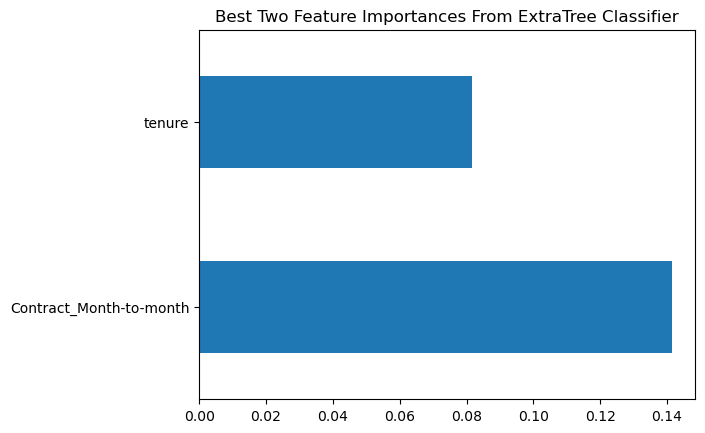

In [58]:
feat_imp[:2].plot(kind = "barh")
plt.title("Best Two Feature Importances From ExtraTree Classifier")
plt.show()